In [1]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import sklearn  # Scikit-Learn for machine learning models and tools
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from langdetect import detect  # For detecting the language of a given text
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # To access common stopwords in various languages
from nltk.tokenize import word_tokenize  # For tokenizing strings into words
import re  # Regular expressions for text manipulation
from deep_translator import GoogleTranslator  # For language translation

# Download necessary NLTK data
nltk.download('punkt', quiet=True)  # Download the tokenizer models, silently without output
nltk.download('stopwords', quiet=True)  # Download a set of stopwords, silently without output

# Define the path for storing generated PNG files
pngPath = 'png/'

# Disable warnings in pandas that arise from chained assignments
pd.options.mode.chained_assignment = None  # This avoids SettingWithCopyWarning in pandas


In [2]:
# Function to convert a .txt file to a .csv file and return the path of the created .csv file
def toCSV(txtName):
    csvName = txtName.replace('.txt','.csv')  # Replace the file extension from .txt to .csv
    # Read the .txt file into a DataFrame, assuming tab-separated values
    df = pd.read_csv(txtName, sep="\t", skiprows=(0),  header=(0))  
    # Rename the column 'imageId(s)' to 'imageId'
    df.rename(columns={'imageId(s)': 'imageId'}, inplace=True)  
    # Save the DataFrame to a .csv file without including the index column
    df.to_csv(csvName, index=None)  
    # Return the path of the created .csv file
    return csvName  

# Convert training and test .txt files to .csv files and obtain their paths
trainSetPath = toCSV('dataset/mediaeval-2015-trainingset.txt')
testSetPath = toCSV('dataset/mediaeval-2015-testset.txt')

# Read the training and test data from the generated .csv files into DataFrames
trainSet_origin = pd.read_csv(trainSetPath)
testSet_origin = pd.read_csv(testSetPath)

# Uncomment the lines below to display the content of the trainSet and testSet DataFrames
# print(trainSet)
# print(testSet)

# Select only the 'tweetText', 'label', and 'imageId' columns for the training and test sets
trainSet = trainSet_origin[['tweetText','label','imageId']]
testSet = testSet_origin[['tweetText','label','imageId']]


In [3]:
trainSet_origin

,tweetId,tweetText,userId,imageId,username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake
...,...,...,...,...,...,...,...
14272,443231991593304064,@BobombDom *slaps TweetDeck with the PigFish h...,2179310905,pigFish_01,Da_Vault_Hunter,Tue Mar 11 03: 48: 36 +0000 2014,fake
14273,443086239127076865,New Species of Fish found in Brazil or just Re...,254843101,pigFish_01,DjSituation_RC,Mon Mar 10 18: 09: 26 +0000 2014,fake
14274,442978105238753280,What do we call this? #pigFISH http: \/\/t.co\...,2367553228,pigFish_01,Vivo1Vuyo,Mon Mar 10 10: 59: 45 +0000 2014,fake
14275,442753479782989824,Pigfish ? E dopo il pescecane c'è il pesce mai...,603120231,pigFish_01,CosimoTarta,Sun Mar 09 20: 07: 10 +0000 2014,fake


In [4]:
testSet

,tweetText,label,imageId
0,kereeen RT @Shyman33: Eclipse from ISS.... htt...,fake,eclipse_01
1,Absolutely beautiful! RT @Shyman33: Eclipse fr...,fake,eclipse_01
2,“@Shyman33: Eclipse from ISS.... http://t.co/C...,fake,eclipse_01
3,Eclipse from ISS.... http://t.co/En87OtvsU6,fake,eclipse_01
4,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,fake,eclipse_01
...,...,...,...
3750,Un présentateur de la ZDF confesse avoir truqu...,fake,varoufakis_1
3751,"Oh les kleine menteurs ""@CorineBarella: Un pré...",fake,varoufakis_1
3752,Este es el programa de ZDF en el que confirman...,fake,varoufakis_1
3753,11.34 - wir haben FAST Mittag ▶ Riesen Verwirr...,fake,varoufakis_1


In [5]:
# Data Preprocessing 
trainSet.head()

,tweetText,label,imageId
0,¿Se acuerdan de la película: “El día después d...,fake,sandyA_fake_46
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,fake,sandyA_fake_09
2,"Buena la foto del Huracán Sandy, me recuerda a...",fake,sandyA_fake_09
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,fake,sandyA_fake_29
4,My fave place in the world #nyc #hurricane #sa...,fake,sandyA_fake_15


In [6]:
# Creating a new column 'tweetLength' by calculating the length of each 'tweetText' entry
trainSet['tweetLength'] = trainSet['tweetText'].str.len()

# Displaying the updated DataFrame with the newly added 'tweetLength' column
trainSet


,tweetText,label,imageId,tweetLength
0,¿Se acuerdan de la película: “El día después d...,fake,sandyA_fake_46,134
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,fake,sandyA_fake_09,133
2,"Buena la foto del Huracán Sandy, me recuerda a...",fake,sandyA_fake_09,116
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,fake,sandyA_fake_29,46
4,My fave place in the world #nyc #hurricane #sa...,fake,sandyA_fake_15,89
...,...,...,...,...
14272,@BobombDom *slaps TweetDeck with the PigFish h...,fake,pigFish_01,71
14273,New Species of Fish found in Brazil or just Re...,fake,pigFish_01,124
14274,What do we call this? #pigFISH http: \/\/t.co\...,fake,pigFish_01,57
14275,Pigfish ? E dopo il pescecane c'è il pesce mai...,fake,pigFish_01,81


In [7]:
trainSet['tweetText'].describe()

count                                                 14277
unique                                                12376
top       Unbelievable scene flying over #StatenIsland i...
freq                                                     42
Name: tweetText, dtype: object

In [8]:
# Remove duplicate rows in the DataFrame based on 'tweetText' column
trainSet = trainSet.drop_duplicates(subset='tweetText')
# Reset the index of the DataFrame for consistency after dropping duplicates
# 'drop=True' ensures the old index is not added as a new column
trainSet = trainSet.reset_index(drop=True)

# Display the DataFrame
trainSet


,tweetText,label,imageId,tweetLength
0,¿Se acuerdan de la película: “El día después d...,fake,sandyA_fake_46,134
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,fake,sandyA_fake_09,133
2,"Buena la foto del Huracán Sandy, me recuerda a...",fake,sandyA_fake_09,116
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,fake,sandyA_fake_29,46
4,My fave place in the world #nyc #hurricane #sa...,fake,sandyA_fake_15,89
...,...,...,...,...
12371,@BobombDom *slaps TweetDeck with the PigFish h...,fake,pigFish_01,71
12372,New Species of Fish found in Brazil or just Re...,fake,pigFish_01,124
12373,What do we call this? #pigFISH http: \/\/t.co\...,fake,pigFish_01,57
12374,Pigfish ? E dopo il pescecane c'è il pesce mai...,fake,pigFish_01,81


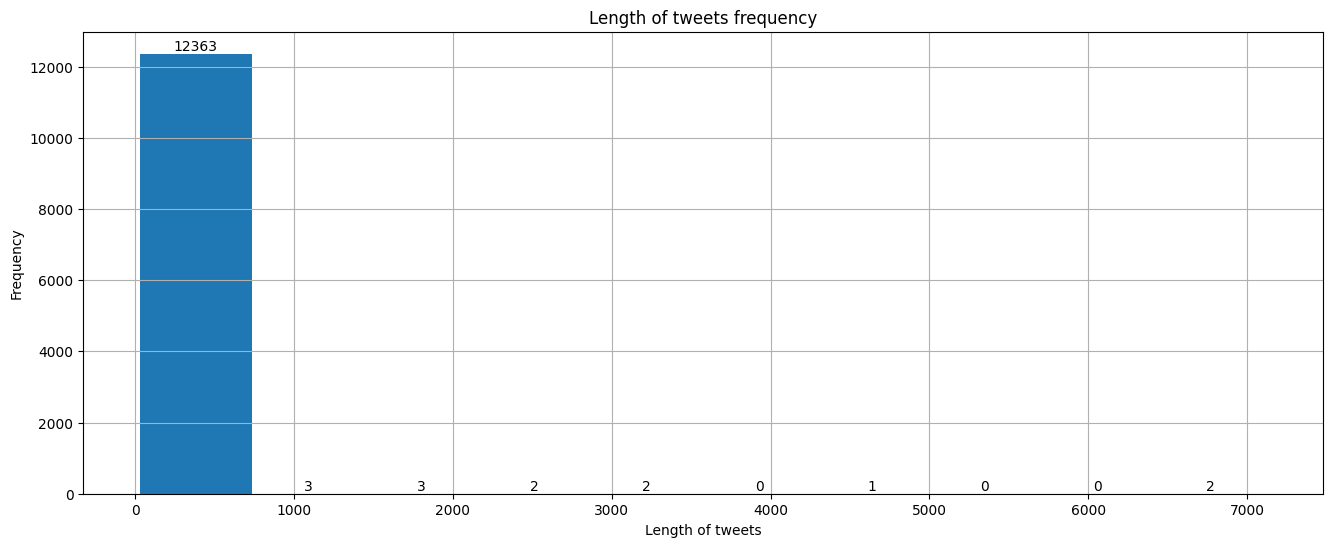

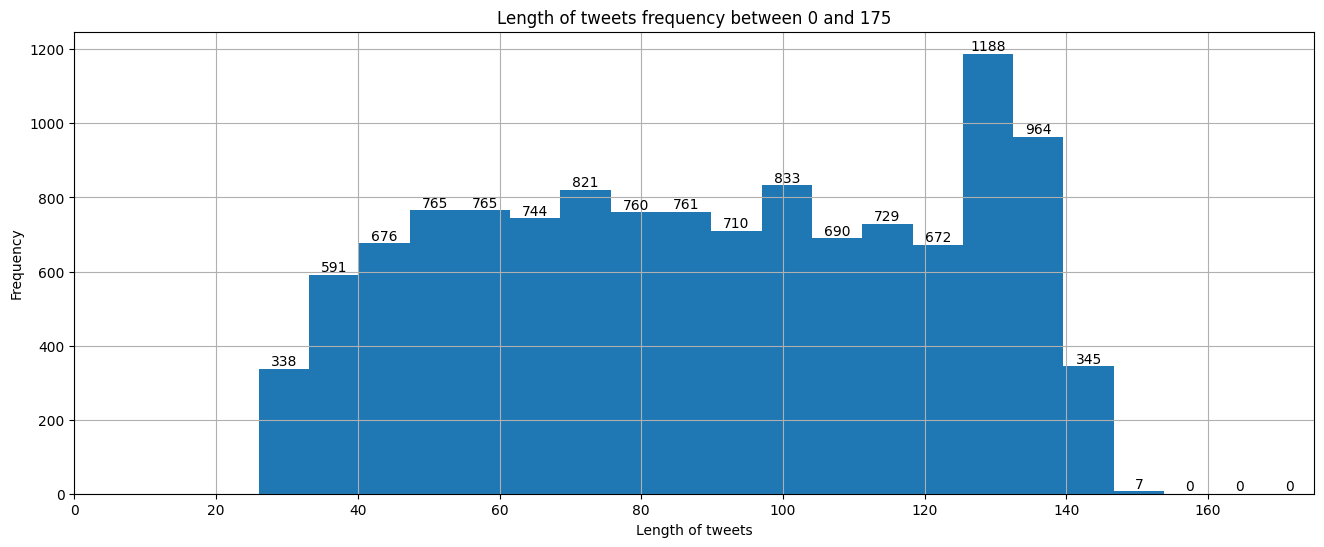

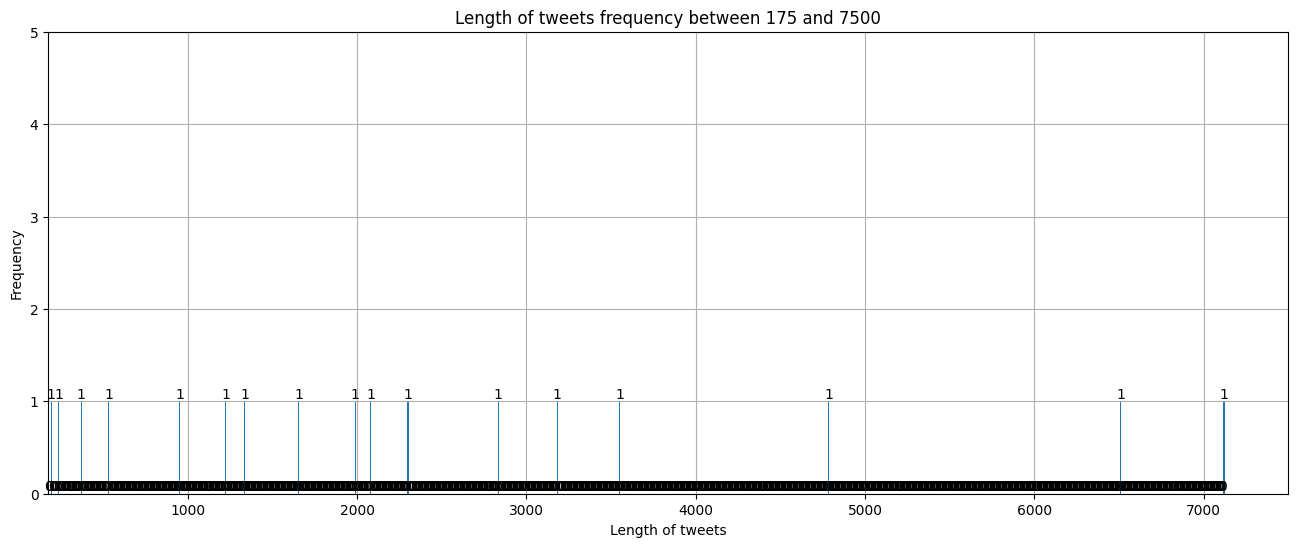

In [9]:
data = trainSet['tweetLength']  # Extracting the 'tweetLength' column data from the DataFrame

# Function to plot histograms for tweet length frequencies
def plotNumberTweets(data, bins, xlim, xMin, xMax, ylim, yMin, yMax):
    plt.figure(figsize=(16, 6))  # Set the figure size for the plot

    # Setting x-axis limits if xlim is True
    if xlim:
        plt.xlim(xMin, xMax)

    # Setting y-axis limits if ylim is True
    if ylim:
        plt.ylim(yMin, yMax)

    # Generating the histogram with specified bins and storing counts, edges, and bars
    counts, edges, bars = plt.hist(data, bins=bins)

    plt.xlabel('Length of tweets')  # Label for x-axis
    plt.ylabel('Frequency')  # Label for y-axis

    # Creating a title based on the specified x-axis limits
    if xlim:
        title = 'Length of tweets frequency between ' + str(xMin) + ' and ' + str(xMax)
    else:
        title = 'Length of tweets frequency'

    plt.title(title)  # Setting the title of the plot
    plt.grid(True)  # Display grid lines

    # Adding labels on top of bars with their respective counts
    plt.bar_label(bars)

    # Saving the plot as a PNG file using the specified path and title
    plt.savefig(pngPath + title + '.png')

    plt.show()  # Display the generated plot

# Plotting the tweet length frequency without restricting x or y limits
plotNumberTweets(data, 10, False, '', '', False, '', '')

# Zooming in on the high-frequency area (x-axis limits: 0 to 175)
plotNumberTweets(data, 1000, True, 0, 175, False, '', '')

# Zooming in on the low-frequency area (x-axis limits: 175 to 7500, y-axis limits: 0 to 5)
plotNumberTweets(data, 1000, True, 175, 7500, True, 0, 5)


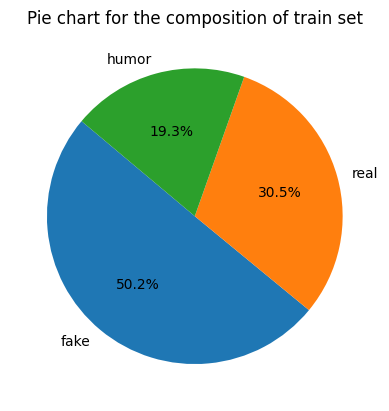

In [10]:
data = []  # Initializing an empty list to store label counts
labels = trainSet["label"].value_counts().index  # Extracting unique labels from the 'label' column
for i in trainSet["label"].value_counts():
    data.append(i)  # Appending counts of each label to the 'data' list

# Creating a pie chart using matplotlib's plt.pie()
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)

title = 'Pie chart for the composition of train set'  # Defining the title for the pie chart
plt.title(title)  # Setting the title of the pie chart

# Saving the pie chart as a PNG file using the specified path and title
plt.savefig(pngPath + title + '.png')

plt.show()  # Displaying the pie chart


In [11]:
# Source:https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python/49146722#49146722
# Function to remove emojis from a string using regular expressions
def remove_emoji(string):
    # Define a regex pattern to match emojis and substitute them with an empty string
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)  # Remove emojis from the input string

# Function to remove stopwords from text using NLTK's English stopwords corpus
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Set of English stopwords
    word_tokens = word_tokenize(text)  # Tokenize the text into words

    # Filter out stopwords and create a list of non-stopwords words
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)  # Join the non-stopwords words back into a single string

def remove_noise(text):
    # Remove URL
    text_no_url = re.sub(r'http\S+|www\S+', ' ', text)
    
    # Remove non-alphanumeric characters and punctuation
    text_cleaned = re.sub('[^a-zA-Z0-9]+\s*', ' ',text_no_url)
    
    return text_cleaned
    
def lower_case(text):
    return text.lower()

# Function to detect the language of the given text using the langdetect library
def detect_language(text):
    try:
        language = detect(text)  # Attempt to detect the language of the text
        return language  # Return the detected language
    except Exception as e:
        return 'other'  # If language detection fails, return 'other'

# Apply preprocessing functions to the 'tweetText' column in the trainSet DataFrame
trainSet['removed'] = trainSet['tweetText'].apply(remove_noise).apply(remove_emoji).apply(remove_stopwords).apply(lower_case)  # Remove emojis and stopwords
trainSet['Language'] = trainSet['removed'].apply(lambda text: detect_language(text))  # Detect language of the cleaned text

# Display the first few rows of the updated trainSet DataFrame with the newly added 'removed' and 'Language' columns
trainSet.head()


,tweetText,label,imageId,tweetLength,removed,Language
0,¿Se acuerdan de la película: “El día después d...,fake,sandyA_fake_46,134,se acuerdan de la pel cula el despu de ana rec...,es
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,fake,sandyA_fake_09,133,milenagimon miren sandy en ny tremenda imagen ...,es
2,"Buena la foto del Huracán Sandy, me recuerda a...",fake,sandyA_fake_09,116,buena la foto del hurac n sandy recuerda la pe...,es
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,fake,sandyA_fake_29,46,scary shit hurricane ny,en
4,My fave place in the world #nyc #hurricane #sa...,fake,sandyA_fake_15,89,fave place world nyc hurricane sandy statueofl...,en


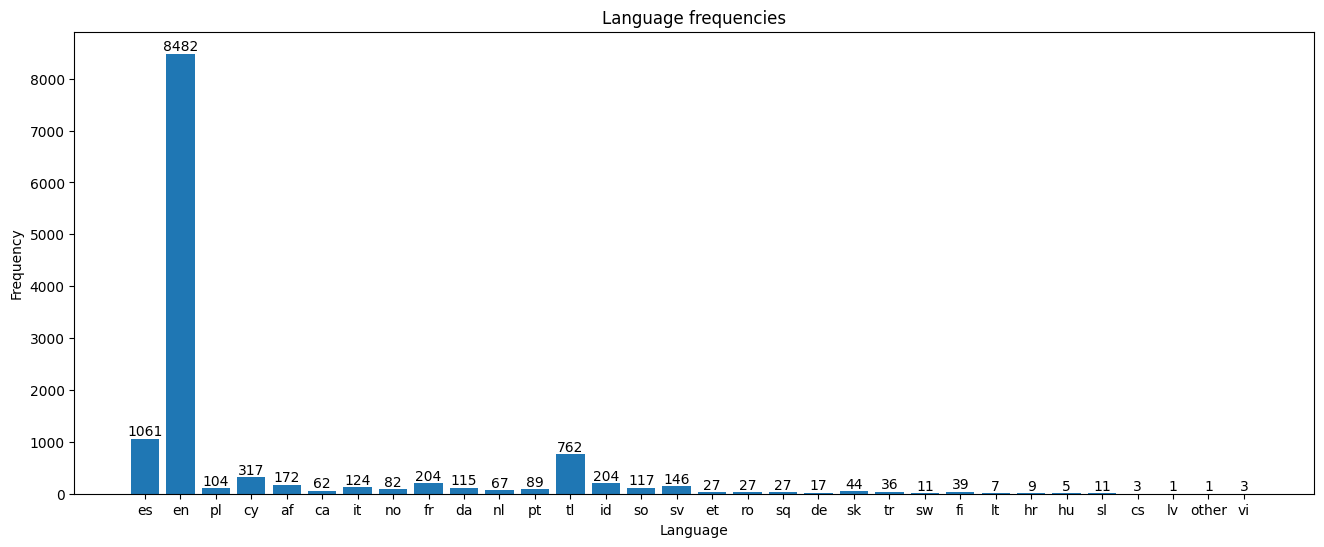

In [12]:
# Get unique languages present in the 'Language' column of the trainSet DataFrame
unique_languages = trainSet['Language'].unique()

# Create an empty list to store counts of each unique language
language_counts = []

# Loop through unique languages and count occurrences in the 'Language' column
for language in unique_languages:
    count = 0
    # Count occurrences of the current language in the 'Language' column
    for entry in trainSet['Language']:
        if entry == language:
            count += 1
    # Append the count to the list of language counts
    language_counts.append(count)

# Create a bar plot to visualize language frequencies
plt.figure(figsize=(16, 6))  # Set the figure size
title = 'Language frequencies'  # Define the title for the plot
bars = plt.bar(unique_languages, language_counts)  # Create bars for each language with respective counts
plt.xlabel('Language')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title(title)  # Set the title of the plot
plt.bar_label(bars)  # Add labels on top of each bar showing the frequency
plt.savefig(pngPath + title + '.png')  # Save the plot as a PNG file
plt.show()  # Display the plot


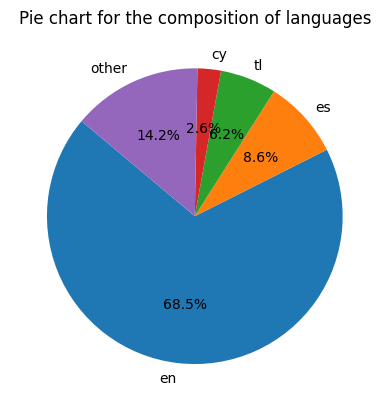

In [13]:

# Calculating the value counts of each language in the 'Language' column of the trainSet DataFrame
def pie_plt(trainSet):
    pie_data = trainSet['Language'].value_counts()
    
    # Initialize empty lists for storing pie chart data
    tmp_data = []  # Data for languages with counts > 300 or 'other'
    labels = []  # Labels for pie chart sections
    count = 0  # Count for languages with counts <= 300
    index = pie_data.index  # Index of the value counts
    
    # Loop through each language and its count
    for i in range(len(pie_data)):
        # Check if the language count is greater than 300
        if pie_data.iloc[i] > 300:
            tmp_data.append(pie_data.iloc[i])  # Append count to tmp_data
            labels.append(index[i])  # Append language label to labels
        else:
            count += int(pie_data.iloc[i])  # Aggregate counts <= 300
    
    # Append the aggregated count for languages with counts <= 300 as 'other'
    tmp_data.append(count)
    labels.append('other')
    
    # Create a pie chart using matplotlib's plt.pie()
    plt.pie(tmp_data, labels=labels, autopct='%1.1f%%', startangle=140)
    
    title = 'Pie chart for the composition of languages'  # Define the title for the pie chart
    plt.title(title)  # Set the title of the pie chart
    
    # Save the pie chart as a PNG file using the specified path and title
    plt.savefig(pngPath + title + '.png')
    
    plt.show()  # Display the pie chart

pie_plt(trainSet)

In [14]:
# Function to translate text to English using Google Translator
def translate_to_english(text):
    translated = GoogleTranslator(source='auto', target='en').translate(text)
    return translated

# Empty list to store translated text
translated = []

# Loop through each entry in the 'removed' column of the trainSet DataFrame
for i in range(len(trainSet['removed'])):
    # Check if the language is not already English
    if trainSet['Language'][i] != 'en':
        # If not English, translate the text to English and append it to 'translated'
        translated.append(translate_to_english(trainSet['removed'][i]))
    else:
        # If already English, keep the text as it is and append it to 'translated'
        translated.append(trainSet['removed'][i])

# Create a new column 'translated' in the trainSet DataFrame with the translated text
trainSet['translated'] = translated
trainSet['translated'] = trainSet['translated'].apply(remove_noise).apply(remove_emoji).apply(remove_stopwords).apply(lower_case)

# Display the first few rows of the updated trainSet DataFrame
trainSet.head()


,tweetText,label,imageId,tweetLength,removed,Language,translated
0,¿Se acuerdan de la película: “El día después d...,fake,sandyA_fake_46,134,se acuerdan de la pel cula el despu de ana rec...,es,remember movie ana remember happening hurrican...
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,fake,sandyA_fake_09,133,milenagimon miren sandy en ny tremenda imagen ...,es,milenagimon look sandy ny tremendous image hur...
2,"Buena la foto del Huracán Sandy, me recuerda a...",fake,sandyA_fake_09,116,buena la foto del hurac n sandy recuerda la pe...,es,good photo hurricane sandy reminds us independ...
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,fake,sandyA_fake_29,46,scary shit hurricane ny,en,scary shit hurricane ny
4,My fave place in the world #nyc #hurricane #sa...,fake,sandyA_fake_15,89,fave place world nyc hurricane sandy statueofl...,en,fave place world nyc hurricane sandy statueofl...


In [15]:
testSet['removed'] = testSet['tweetText'].apply(remove_noise).apply(remove_emoji).apply(remove_stopwords).apply(lower_case)

translated = []
# Loop through each entry in the 'removed' column of the testSet DataFrame
for i in range(len(testSet['removed'])):
    # Check if the language is not already English
    if detect_language(testSet['removed'][i]) != 'en':
        # If not English, translate the text to English and append it to 'translated'
        translated.append(translate_to_english(testSet['removed'][i]))
    else:
        # If already English, keep the text as it is and append it to 'translated'
        translated.append(testSet['removed'][i])

# Create a new column 'translated' in the testSet DataFrame with the translated text
testSet['translated'] = translated
testSet['translated'] = testSet['translated'].apply(remove_noise).apply(remove_emoji).apply(remove_stopwords).apply(lower_case)
testSet.head()

,tweetText,label,imageId,removed,translated
0,kereeen RT @Shyman33: Eclipse from ISS.... htt...,fake,eclipse_01,kereeen rt shyman33 eclipse iss,kereeen rt shyman33 eclipse iss
1,Absolutely beautiful! RT @Shyman33: Eclipse fr...,fake,eclipse_01,absolutely beautiful rt shyman33 eclipse iss,absolutely beautiful rt shyman33 eclipse iss
2,“@Shyman33: Eclipse from ISS.... http://t.co/C...,fake,eclipse_01,shyman33 eclipse iss 3 20 wow amazing,shyman33 eclipse iss 3 20 wow amazing
3,Eclipse from ISS.... http://t.co/En87OtvsU6,fake,eclipse_01,eclipse iss,eclipse iss
4,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,fake,eclipse_01,ebonfigli clipse vue de l iss autre chose cr a...,ebonfigli clips seen liss something else divin...


In [16]:
def changeLabel(x):
    '''
    change all label which is fake or humor to 1 (positive)
    change all label which is real to 0 (negative)
    '''
    for i in range(len(x)):
        if x[i] == 'fake' or x[i] == 'humor':
            x[i] = 1  # Change 'fake' or 'humor' labels to 0
        elif x[i] == 'real':
            x[i] = 0  # Change 'real' labels to 1
    return x

# Apply the changeLabel function to the 'label' column in the trainSet and testSet DataFrames
trainSet['label'] = changeLabel(trainSet['label'])
testSet['label'] = changeLabel(testSet['label'])


In [17]:
# Display the first few rows of the updated trainSet DataFrame
trainSet.head()

,tweetText,label,imageId,tweetLength,removed,Language,translated
0,¿Se acuerdan de la película: “El día después d...,1,sandyA_fake_46,134,se acuerdan de la pel cula el despu de ana rec...,es,remember movie ana remember happening hurrican...
1,@milenagimon: Miren a Sandy en NY! Tremenda i...,1,sandyA_fake_09,133,milenagimon miren sandy en ny tremenda imagen ...,es,milenagimon look sandy ny tremendous image hur...
2,"Buena la foto del Huracán Sandy, me recuerda a...",1,sandyA_fake_09,116,buena la foto del hurac n sandy recuerda la pe...,es,good photo hurricane sandy reminds us independ...
3,Scary shit #hurricane #NY http://t.co/e4JLBUfH,1,sandyA_fake_29,46,scary shit hurricane ny,en,scary shit hurricane ny
4,My fave place in the world #nyc #hurricane #sa...,1,sandyA_fake_15,89,fave place world nyc hurricane sandy statueofl...,en,fave place world nyc hurricane sandy statueofl...


In [18]:
testSet.head()

,tweetText,label,imageId,removed,translated
0,kereeen RT @Shyman33: Eclipse from ISS.... htt...,1,eclipse_01,kereeen rt shyman33 eclipse iss,kereeen rt shyman33 eclipse iss
1,Absolutely beautiful! RT @Shyman33: Eclipse fr...,1,eclipse_01,absolutely beautiful rt shyman33 eclipse iss,absolutely beautiful rt shyman33 eclipse iss
2,“@Shyman33: Eclipse from ISS.... http://t.co/C...,1,eclipse_01,shyman33 eclipse iss 3 20 wow amazing,shyman33 eclipse iss 3 20 wow amazing
3,Eclipse from ISS.... http://t.co/En87OtvsU6,1,eclipse_01,eclipse iss,eclipse iss
4,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,1,eclipse_01,ebonfigli clipse vue de l iss autre chose cr a...,ebonfigli clips seen liss something else divin...


In [19]:
# Generate summary statistics for the 'label' column in the trainSet DataFrame
trainSet['label'].describe()

count     12376
unique        2
top           1
freq       8597
Name: label, dtype: int64

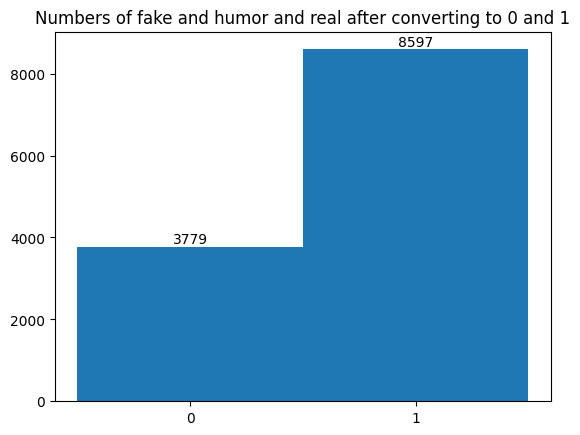

In [20]:
labelType = trainSet['label']  # Extract the 'label' column data

# Create a histogram of label frequencies after conversion
counts, edges, bars = plt.hist(labelType, bins=[-0.5, 0.5, 1.5])

title = 'Numbers of fake and humor and real after converting to 0 and 1'  # Define the title for the plot
plt.title(title)  # Set the title of the plot
plt.bar_label(bars)  # Add labels on top of each bar showing the frequency
plt.xticks([0, 1])  # Set the x-axis ticks to show 0 and 1
plt.savefig(pngPath + title + '.png')  # Save the plot as a PNG file
plt.show()  # Display the plot


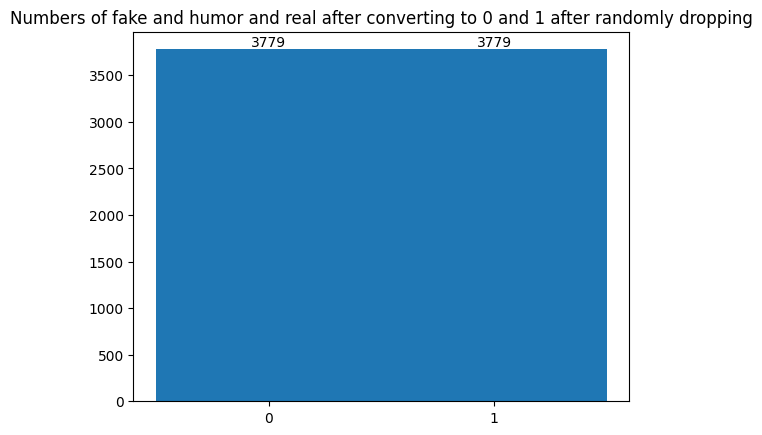

In [21]:
# Separate the dataset into two sets based on the label (0 or 1)
set_1 = trainSet[trainSet['label'] == 1]  # Subset where label is 1
set_0 = trainSet[trainSet['label'] == 0]  # Subset where label is 0

# Randomly sample rows from set_1 to make its length equal to set_0
rows_to_remove = set_1.sample(len(set_1) - len(set_0), random_state=1000)

# Drop the sampled rows from the main dataset and reset the index
trainSet_dropped = trainSet.drop(rows_to_remove.index).reset_index(drop=True)

# Extract the 'label' column data from the balanced dataset
labelType = trainSet_dropped['label']

# Create a histogram to visualize the frequency of each label type
counts, edges, bars = plt.hist(labelType, bins=[-0.5, 0.5, 1.5])  # Histogram bins set around 0 and 1

# Define and set the title of the plot
title = 'Numbers of fake and humor and real after converting to 0 and 1 after randomly dropping'
plt.title(title)

# Add labels on top of each bar indicating the frequency count
plt.bar_label(bars)

# Set x-axis ticks to clearly show the labels 0 and 1
plt.xticks([0, 1])

# Save the histogram as a PNG file using the specified path
plt.savefig(pngPath + title + '.png')

# Display the histogram plot
plt.show()


In [22]:
trainSet_dropped

,tweetText,label,imageId,tweetLength,removed,Language,translated
0,¿Se acuerdan de la película: “El día después d...,1,sandyA_fake_46,134,se acuerdan de la pel cula el despu de ana rec...,es,remember movie ana remember happening hurrican...
1,"Buena la foto del Huracán Sandy, me recuerda a...",1,sandyA_fake_09,116,buena la foto del hurac n sandy recuerda la pe...,es,good photo hurricane sandy reminds us independ...
2,#sandy #newyork #hurricane #statueofliberty #U...,1,sandyA_fake_15,69,sandy newyork hurricane statueofliberty usa,en,sandy newyork hurricane statueofliberty usa
3,#Crazy #Hurricane #Sandy http://t.co/0zrMsgvs,1,sandyA_fake_29,45,crazy hurricane sandy,en,crazy hurricane sandy
4,#shark #newjersey #swim #sandy #hurricane  ...,1,sandyA_fake_11,66,shark newjersey swim sandy hurricane,en,shark newjersey swim sandy hurricane
...,...,...,...,...,...,...,...
7553,El mundo está loco... una red social que solo ...,1,livr_02,136,el mundo est loco una red social que solo te a...,es,world crazy social network accepts drunk livr ...
7554,"Southern Alabama pigfish, tastes just like bac...",1,pigFish_01,76,southern alabama pigfish tastes like bacon co ...,en,southern alabama pigfish tastes like bacon co ...
7555,#pig #pigfish #pigg http: \/\/t.co\/DApuPekUBI,1,pigFish_01,46,pig pigfish pigg co dapupekubi,tl,pig pigfish pig co dapupekubi
7556,Pigfish ? E dopo il pescecane c'è il pesce mai...,1,pigFish_01,81,pigfish e dopo il pescecane c il pesce maiale ...,it,pigfish dogfish pigfish co hqzwghydef


In [23]:
trainSet_dropped.head()

,tweetText,label,imageId,tweetLength,removed,Language,translated
0,¿Se acuerdan de la película: “El día después d...,1,sandyA_fake_46,134,se acuerdan de la pel cula el despu de ana rec...,es,remember movie ana remember happening hurrican...
1,"Buena la foto del Huracán Sandy, me recuerda a...",1,sandyA_fake_09,116,buena la foto del hurac n sandy recuerda la pe...,es,good photo hurricane sandy reminds us independ...
2,#sandy #newyork #hurricane #statueofliberty #U...,1,sandyA_fake_15,69,sandy newyork hurricane statueofliberty usa,en,sandy newyork hurricane statueofliberty usa
3,#Crazy #Hurricane #Sandy http://t.co/0zrMsgvs,1,sandyA_fake_29,45,crazy hurricane sandy,en,crazy hurricane sandy
4,#shark #newjersey #swim #sandy #hurricane  ...,1,sandyA_fake_11,66,shark newjersey swim sandy hurricane,en,shark newjersey swim sandy hurricane


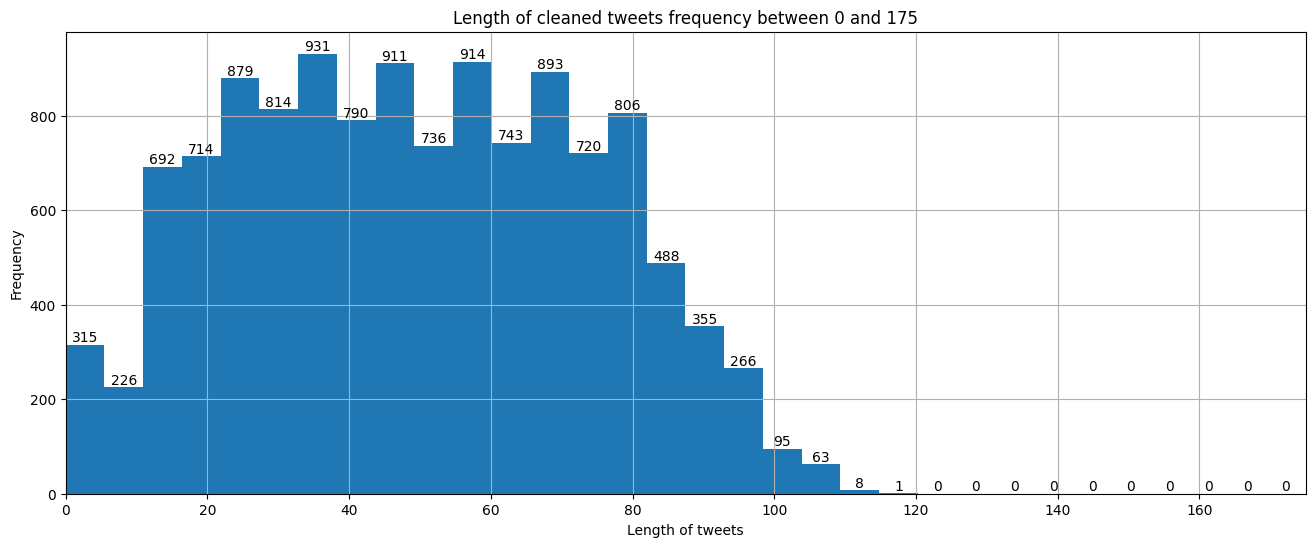

In [24]:
#create new column with length of cleaned text
trainSet['tweetCleanedLength'] = trainSet['translated'].str.len()
data = trainSet['tweetCleanedLength']

plt.figure(figsize=(16, 6))  # Set the figure size for the plot

plt.xlim(0, 175)

counts, edges, bars = plt.hist(data, bins=1000)

plt.xlabel('Length of tweets')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis

title = 'Length of cleaned tweets frequency between ' + str(0) + ' and ' + str(175)

plt.title(title)  # Setting the title of the plot
plt.grid(True)  # Display grid lines

# Adding labels on top of bars with their respective counts
plt.bar_label(bars)

# Saving the plot as a PNG file using the specified path and title
plt.savefig(pngPath + title + '.png')

plt.show()


In [25]:
# Machine learning Algorithms
# Splitting data
# X_train = trainSet[trainSet['translated'].str.len() < 200]['translated']
# y_train =  trainSet[trainSet['translated'].str.len() < 200]['label'].astype(int)
X_train_dropped = trainSet_dropped['translated']
y_train_dropped = trainSet_dropped['label'].astype(int)
X_train = trainSet[trainSet['translated'].str.len() < 120]['translated']
y_train = trainSet[trainSet['translated'].str.len() < 120]['label'].astype(int)
X_test = testSet['translated']
y_test = testSet['label'].astype(int)


In [26]:
from sklearn.metrics import f1_score  # Import the f1_score function from sklearn

# Define a function to calculate and print the F1 score
def cal_f1(pred, name):
    # Calculate the F1 score using the provided predictions and true values (y_test)
    # The 'average="micro"' parameter calculates metrics globally by counting the total true positives, false negatives, and false positives
    f1 = round(f1_score(y_true=y_test, y_pred=pred, average="micro"), 3)

    # Print the F1 score with a message indicating the name of the model or method used
    print('The f1 score for ' + name + ' is: ', f1)

    # Return the calculated F1 score
    return f1


              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1209
           1       0.88      0.89      0.89      2546

    accuracy                           0.85      3755
   macro avg       0.83      0.82      0.82      3755
weighted avg       0.85      0.85      0.85      3755

The f1 score for MultinomialNB is:  0.847


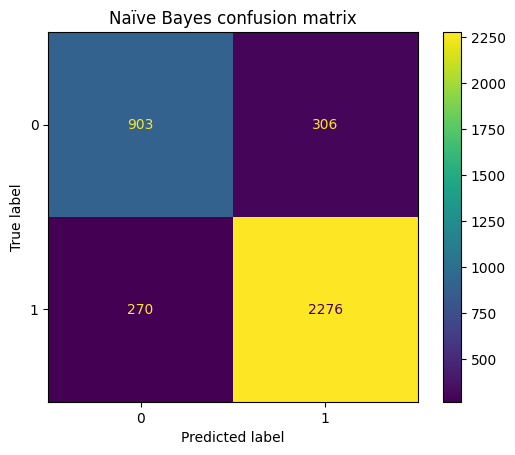

In [27]:
# Import necessary modules from scikit-learn
from sklearn.pipeline import Pipeline  # To create a processing pipeline
from sklearn.naive_bayes import MultinomialNB  # Multinomial Naive Bayes classifier
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # For model evaluation
from sklearn.model_selection import cross_validate  # For cross-validation

# Define a pipeline for the Naïve Bayes model
# It first transforms the text data using TF-IDF vectorization, then applies the Multinomial Naive Bayes classifier
mnb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # First step: Text vectorization
    ('mnb', MultinomialNB())  # Second step: Naive Bayes classifier
])

# Train the Naïve Bayes model on the training data
mnb_model = mnb_pipeline.fit(X_train, y_train)

# Predict the labels on the test set
mnb_pred = mnb_model.predict(X_test)

# Print the classification report for performance analysis
print(classification_report(y_test, mnb_pred))

# Calculate and print the F1 score using the previously defined function
f1_mnb = cal_f1(mnb_pred, 'MultinomialNB')

# Generate and display a confusion matrix for the model
ConfusionMatrixDisplay.from_estimator(mnb_model, X_test, y_test)
title = 'Naïve Bayes confusion matrix'  # Title for the confusion matrix plot
plt.title(title)
plt.savefig(pngPath + title + '.png')  # Save the confusion matrix plot as a PNG file
plt.show()  # Show the confusion matrix plot


In [28]:
# Train the Naïve Bayes model using the dropped/balanced training dataset
mnb_model_dropped = mnb_pipeline.fit(X_train_dropped, y_train_dropped)

# Predict the labels on the original test set using the new model
mnb_pred_dropped = mnb_model_dropped.predict(X_test)

# Print the classification report for the new model
print(classification_report(y_test, mnb_pred_dropped))

# Calculate and print the F1 score for the model trained on the dropped dataset
f1_mnb_dropped = cal_f1(mnb_pred_dropped, 'MultinomialNB with dropped trainSet')


              precision    recall  f1-score   support

           0       0.33      0.91      0.48      1209
           1       0.71      0.10      0.18      2546

    accuracy                           0.36      3755
   macro avg       0.52      0.51      0.33      3755
weighted avg       0.59      0.36      0.28      3755

The f1 score for MultinomialNB with dropped trainSet is:  0.364


In [29]:
#get parameters of the model
mnb_pipeline.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())],
 'verbose': False,
 'tfidf': TfidfVectorizer(),
 'mnb': MultinomialNB(),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': None,
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'mnb__alpha': 1.0,
 'mnb__class_prior': None,
 'mnb__fit_prior': True,
 'mnb__force_alpha': 'warn'}

In [30]:
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning

# Define a parameter grid for the grid search
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],  # Variations for 'max_df' in TfidfVectorizer
    'mnb__alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000]  # Variations for 'alpha' in MultinomialNB
}

# Initialize GridSearchCV with the Naïve Bayes pipeline and the parameter grid
mnb_grid_search = GridSearchCV(mnb_model, param_grid, scoring='f1_micro', n_jobs=-1, verbose=1)

# Perform the grid search on the training data
mnb_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'mnb__alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                        1000],
                         'tfidf__max_df': [0.5, 0.75, 1.0]},
             scoring='f1_micro', verbose=1)

In [31]:
# evaluate the best model on the test set
best_pred_mnb = mnb_grid_search.predict(X_test)
print(classification_report(y_test,best_pred_mnb))
cal_f1(best_pred_mnb, 'MultinomialNB after grid search \non testing set')

              precision    recall  f1-score   support

           0       0.37      0.77      0.50      1209
           1       0.78      0.39      0.52      2546

    accuracy                           0.51      3755
   macro avg       0.58      0.58      0.51      3755
weighted avg       0.65      0.51      0.51      3755

The f1 score for MultinomialNB after grid search 
on testing set is:  0.511


0.511

In [32]:
# evaluate the best model on the train set
best_pred_train = mnb_grid_search.predict(X_train)
print(classification_report(y_train,best_pred_train))
print('The f1 score for ' 
        + 'MultinomialNB after grid search \non training set' + ' is: ', 
        round(f1_score(y_true=y_train, y_pred=best_pred_train, average="micro"), 3))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      3774
           1       0.94      0.99      0.97      8585

    accuracy                           0.95     12359
   macro avg       0.96      0.92      0.94     12359
weighted avg       0.95      0.95      0.95     12359

The f1 score for MultinomialNB after grid search 
on training set is:  0.951


In [33]:
#model start to overfit, 0.85 is the best f1 score

The f1 score for Logistic Regression is:  0.641
              precision    recall  f1-score   support

           0       0.33      0.12      0.17      1209
           1       0.68      0.89      0.77      2546

    accuracy                           0.64      3755
   macro avg       0.51      0.50      0.47      3755
weighted avg       0.57      0.64      0.58      3755



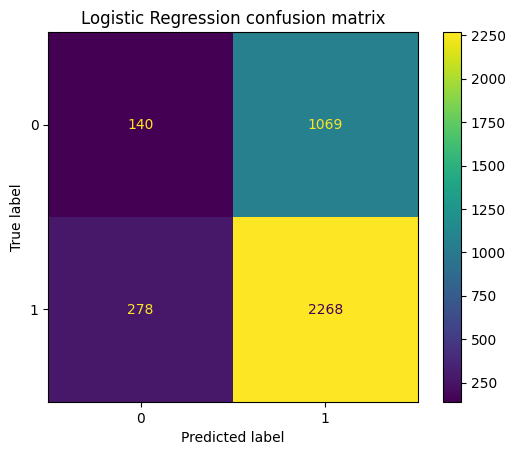

In [34]:
from sklearn.pipeline import Pipeline  # For creating a processing pipeline
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # For model evaluation

# Define a pipeline with TF-IDF vectorization and Logistic Regression model
lr_model = Pipeline([
    ('tfidf', TfidfVectorizer()),  # First step: text vectorization
    ('lr', LogisticRegression())   # Second step: logistic regression classifier
])

# Train the Logistic Regression model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
lr_pred = lr_model.predict(X_test)

# Calculate and print the F1 score
f1_lr = cal_f1(lr_pred, 'Logistic Regression')

# Print the classification report for detailed performance metrics
print(classification_report(y_test, lr_pred))

# Display the confusion matrix for the Logistic Regression model
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)
title = 'Logistic Regression confusion matrix'
plt.title(title)
plt.savefig(pngPath + title + '.png')  # Save the confusion matrix plot
plt.show()  # Show the plot


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
# Import StratifiedKFold for cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.pipeline import Pipeline  # For creating a processing pipeline
from sklearn.metrics import classification_report, accuracy_score  # For model evaluation

# Define a pipeline with TF-IDF vectorization and SVM
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),  # First step: text vectorization
    ('svm', SVC(probability=True, kernel="linear"))  # Second step: SVM with linear kernel
])

# Train the SVM classifier on the training data
model_svm = pipeline_svm.fit(X_train, y_train)

# Predict on the test data
svm_pred = model_svm.predict(X_test)

# Calculate and print the F1 score for the SVM model
f1_svm = cal_f1(svm_pred, 'Support Vector machine')

# Print the classification report for detailed performance metrics
print(classification_report(y_test, svm_pred))

# Calculate and print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, svm_pred))


The f1 score for Support Vector machine is:  0.851
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1209
           1       0.89      0.90      0.89      2546

    accuracy                           0.85      3755
   macro avg       0.83      0.83      0.83      3755
weighted avg       0.85      0.85      0.85      3755

Accuracy: 0.8508655126498003


In [36]:
model_svm.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer()),
  ('svm', SVC(kernel='linear', probability=True))],
 'verbose': False,
 'tfidf': TfidfVectorizer(),
 'svm': SVC(kernel='linear', probability=True),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': None,
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'svm__C': 1.0,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 

In [37]:
# Define StratifiedKFold for cross-validation with 5 splits
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
print(kfolds)  # Print kfolds to verify configuration

# Define a parameter grid for GridSearchCV
# This includes variations for 'max_df' and 'min_df' in TfidfVectorizer, and 'C' in SVM
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 3],
    'svm__C': [0.1, 1.0, 10],
}

# Initialize GridSearchCV with the SVM pipeline, parameter grid, and cross-validator
grid_search_svm = GridSearchCV(model_svm, param_grid, cv=kfolds, n_jobs=-1, verbose=1, scoring='f1_micro')

# Fit the grid search model to the training data
grid_search_svm.fit(X_train, y_train)


StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svm',
                                        SVC(kernel='linear',
                                            probability=True))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1.0, 10],
                         'tfidf__max_df': [0.5, 0.75, 1.0],
                         'tfidf__min_df': [1, 2, 3]},
             scoring='f1_micro', verbose=1)

In [38]:
grid_search_svm.best_params_

{'svm__C': 1.0, 'tfidf__max_df': 0.75, 'tfidf__min_df': 1}

In [39]:
# Use the best model from grid search to predict on the test set
y_pred = grid_search_svm.predict(X_test)

# Print the classification report to evaluate the model
# This report includes key metrics like precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy of the model
# Accuracy is the proportion of correctly predicted observations to the total observations
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1209
           1       0.89      0.90      0.89      2546

    accuracy                           0.85      3755
   macro avg       0.83      0.83      0.83      3755
weighted avg       0.85      0.85      0.85      3755

Accuracy: 0.8508655126498003


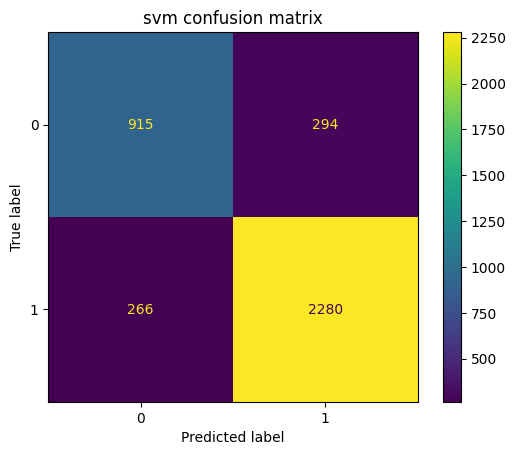

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay  # For displaying confusion matrices

# Generate and display the confusion matrix for the best SVM model
# This is done directly from the estimator obtained from GridSearchCV
ConfusionMatrixDisplay.from_estimator(grid_search_svm, X_test, y_test)

# Set the title for the confusion matrix plot
title = 'svm confusion matrix'
plt.title(title)

# Save the confusion matrix plot as a PNG file
# The file is saved to the specified directory with a descriptive title
plt.savefig(pngPath + title + '.png')

# Show the confusion matrix plot
plt.show()


The f1 score for SVM with balanced data is:  0.399
              precision    recall  f1-score   support

           0       0.34      0.89      0.49      1209
           1       0.76      0.17      0.28      2546

    accuracy                           0.40      3755
   macro avg       0.55      0.53      0.38      3755
weighted avg       0.62      0.40      0.34      3755

Accuracy: 0.3994673768308921


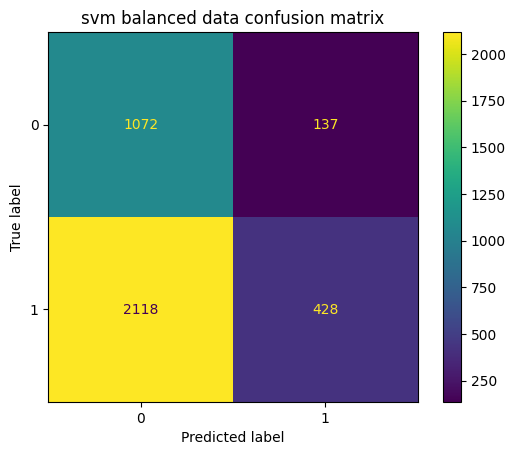

In [41]:
# Setting up a pipeline for SVM classification with a balanced dataset
pipeline_svm_dropped = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text data into TF-IDF features
    ('svm', SVC(probability=True, kernel="linear"))  # Apply a linear SVM Classifier
])

# Train the SVM classifier on the balanced training data
model_svm_dropped = pipeline_svm_dropped.fit(X_train_dropped, y_train_dropped)

# Predict labels for the test data
svm_pred_dropped = model_svm_dropped.predict(X_test)

# Calculate and display the F1 score for the balanced data model
f1_svm_dropped = cal_f1(svm_pred_dropped, 'SVM with balanced data')

# Evaluate the model's performance using classification report and accuracy score
print(classification_report(y_test, svm_pred_dropped))  # Detailed performance metrics
print("Accuracy:", accuracy_score(y_test, svm_pred_dropped))  # Overall accuracy of the model

# Display the confusion matrix for the model
ConfusionMatrixDisplay.from_estimator(model_svm_dropped, X_test, y_test)
title = 'svm balanced data confusion matrix'
plt.title(title)  # Set title for the confusion matrix plot
plt.savefig(pngPath + title + '.png')  # Save the plot as a PNG file
plt.show()  # Show the plot


In [42]:
#add image id in to training set see if it improves the score
X_train_dropped_withImId = trainSet_dropped['translated'] + ' ' + trainSet['imageId']
#y_train_dropped_withImId = trainSet_dropped['label'].astype(int)
X_train_withImId = trainSet[trainSet['translated'].str.len() < 120]['translated'] + '; ' + trainSet[trainSet['translated'].str.len() < 120]['imageId']
#y_train_withImId = trainSet[trainSet['translated'].str.len() < 120]['label'].astype(int)
X_test_withImId = testSet['translated'] + ' ' + testSet['imageId']
#y_test_withImId = testSet['label'].astype(int)

In [43]:
# Train the SVM classifier using the training data that includes image IDs
model_svm_ImId = pipeline_svm.fit(X_train_withImId, y_train)

# Predict labels for the test data that also includes image IDs
svm_pred_ImId = model_svm_ImId.predict(X_test_withImId)

# Calculate and display the F1 score for the SVM model using the image ID data
f1_svm_ImId = cal_f1(svm_pred_ImId, 'Support Vector machine with imageid')

# Print the classification report to evaluate the model's performance
print(classification_report(y_test, svm_pred_ImId))

# Calculate and print the overall accuracy of the model
print("Accuracy:", accuracy_score(y_test, svm_pred_ImId))


The f1 score for Support Vector machine with imageid is:  0.771
              precision    recall  f1-score   support

           0       0.61      0.77      0.69      1209
           1       0.88      0.77      0.82      2546

    accuracy                           0.77      3755
   macro avg       0.75      0.77      0.75      3755
weighted avg       0.79      0.77      0.78      3755

Accuracy: 0.7709720372836218


In [44]:
# Train the Multinomial Naive Bayes model using the training data that includes image IDs
mnb_model_ImId = mnb_pipeline.fit(X_train_withImId, y_train)

# Predict labels for the test data that also includes image IDs
mnb_pred_ImId = mnb_model_ImId.predict(X_test_withImId)

# Calculate and display the F1 score for the MNB model using the image ID data
f1_mnb_ImId = cal_f1(mnb_pred_ImId, 'MultinomialNB with imageid')

# Print the classification report to evaluate the model's performance
print(classification_report(y_test, mnb_pred_ImId))


The f1 score for MultinomialNB with imageid is:  0.83
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1209
           1       0.88      0.87      0.87      2546

    accuracy                           0.83      3755
   macro avg       0.80      0.81      0.81      3755
weighted avg       0.83      0.83      0.83      3755



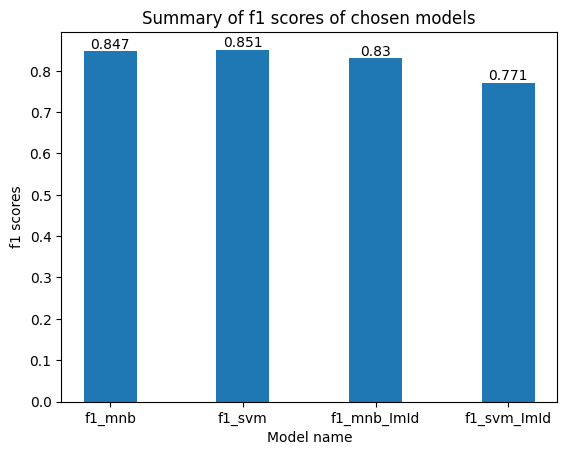

In [45]:
#Store the F1 scores of different models in a dictionary
data = {
    'f1_mnb': f1_mnb,  # F1 score of Multinomial Naive Bayes
    'f1_svm': f1_svm,  # F1 score of Support Vector Machine
    'f1_mnb_ImId': f1_mnb_ImId,  # F1 score of MNB with Image ID data
    'f1_svm_ImId': f1_svm_ImId   # F1 score of SVM with Image ID data
}

# Extract model names and their corresponding F1 scores
name = list(data.keys())  # Model names
values = list(data.values())  # Corresponding F1 scores

# Create a bar chart to visualize the F1 scores
bars = plt.bar(name, values, width=0.4)  # Bar chart creation

# Add labels to each bar showing the F1 score
plt.bar_label(bars)

# Set the labels for x and y axes
plt.xlabel("Model name")
plt.ylabel("f1 scores")

# Set the title of the plot
title = "Summary of f1 scores of chosen models"
plt.title(title)

# Save the plot as a PNG file
plt.savefig(pngPath + title + '.png')

# Display the plot
plt.show()
